In [34]:
from IPython.display import Image

## 3.1 파이썬을 이용한 기술통계: 1번량데이터

### 3.1.1. 통계처리와 scipy

In [2]:
import numpy as np

# scipy : 통계량의 계산이나 기본적인 데이터 분석에 사용되는 함수 패키지
import scipy as sp

In [3]:
# 표시 자릿수 지정하기
# 아래 코드를 실행하면 주피터 노트북에 표시되는 소수점 이하 자릿수는 3이 된다.
%precision 3

'%.3f'

### 3.1.2. 1변량 데이터의 관리

In [4]:
# 1가지 종류의 데이터밖에 없을 경우를 1변량 데이터라고 부른다
# 가공의 10마리의 물고기의 몸길이 데이터 만들기
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### 3.1.3. 합계와 샘플사이즈

In [6]:
# scipy 로 합계 계산하기
sp.sum(fish_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


40

### 3.1.3 평균값(기대값)

In [7]:
# 평균값(기댓값) 구하기
# 평균값 => 총합/총개수
N = len(fish_data)
sum_value = sp.sum(fish_data)

Mean_Value = sum_value/N
Mean_Value # = 4.0

# 위의 공식을 scipy.mean()함수로 간단하게 구할 수 있다
Mean_Value = sp.mean(fish_data) # 위의 Mean_Value와 같은 값 도출
Mean_Value

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  # Remove the CWD from sys.path while we load stuff.


4.0

### 3.1.5 표본분산

분산은 데이터가 평균값에서 얼마나 떨어져 있는지를 나타내는 지표이다.\
분산 = 편차를 제곱한 값의 평균\
표본분산은 표본의 평균을 사용해서 분산을 계산한 값이다.

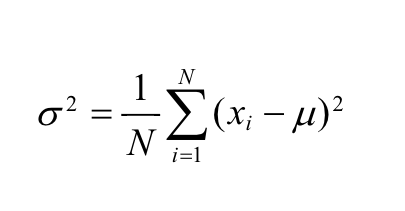

In [8]:
Image('표본분산.png')

In [9]:
# 위의 표본분산 계산식을 파이썬 코드로 구현하면 아래와 같다
sp.sum((fish_data-Mean_Value)**2/N)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


1.2

In [13]:
# 위의 값은 scipy의 var함수를 사용하면 간단히 계산할 수 있다. 
# 디폴트는 ddof = 0이다 
# 불편분산(비편향분산)에 루트값을 취해서 표준편차를 구하는 경우 
# 함수로 ddof = 1을 넘겨서 호출한다
sp.var(fish_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  


1.2

### 3.1.6 불편분산(=비편향분산)

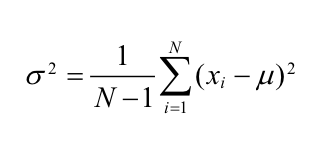

In [14]:
Image('불편분산.png')

In [15]:
# 위의 불편분산 계산식을 파이썬 코드로 구현하면 아래와 같다
sp.sum((fish_data-Mean_Value)**2/(N-1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


1.3333333333333335

### * n으로 나눈 값과 (n-1)로 나눈 값의 차이:
https://m.blog.naver.com/95khc/220282362093

### 3.1.7 표준편차 =  sigma  = Standard Deviation

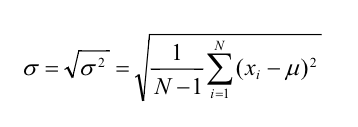

In [16]:
Image('표준편차.png')

### 위의 식을 파이썬 코드로 나타내면 => sigma = sp.sqrt(sigma**2(=분산))

분산은 데이터를 제곱하여 계산했다.(분산이 데이터의 제곱값이라는 말이 아님. 계산할 때 사용하는 데이터를 제곱하여 분산을 계산할 때 썼다는 말.) 이때 단위 등도 제곱이 되는데 이 상태로는 계산이 불편하다. 그래서 분산에 루트를 취한 표준편차를 사용한다. \
= 분산에 루트를 씌우면 __표준편차__

#### ddof (자유도)
상관계수를 구하기 ==> 파이썬은 기본이 n으로 처리되므로\
(n-1)로 처리하려면 ddof =1 을 인수로 넣어야 n-1로 처리된다. 

array(numpy) | Series(pandas)와 | 분산에서의 ddof 차이

 - numpy에서는 자유도(ddof) = 0로 디폴트 적용
 
 - pandas에서는 자유도(ddof) = 1로 디폴트 적용
 
 - 분산을 구할 때 모수를 제외해야하기에 자유도(ddof) = 1로 디폴트 적용


### 파이썬에서 ___표본분산과 표본표준편차___를 구할 때는 다음 함수를 사용한다.
 1) sp.var(data) 2) sp.std(data) 

### ddof 인수를 이용하면 ___비편향 표본분산과 표본표준편차___를 구할 수 있다.

 1) sp.var(data, ddof =1) 2) sp.std(data, ddof =1)

In [19]:
# 불편분산(비편향분산)에 루트값을 취해서 표준편차를 구하는 경우 함수로 ddof = 1을 넘겨서 호출한다
# 상관계수를 구하기 ==> 파이썬은 기본이 n으로 처리되므로 
# (n-1)로 처리하려면 ddof =1 을 인수로 넣어야 n-1로 처리된다. 
sigma = sp.std(fish_data, ddof =1)
sigma

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  after removing the cwd from sys.path.


1.1547005383792515

### 3.1.8 표준화

__데이터의 평균을 0으로, 표준편차(분산의 제곱)를 1로 하는 변환을 표준화 (Z-score)__라고 한다.\
여러 변수를 다룰 때 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교한다. \
데이터의 평균값을 0으로 하는 것은 \
__모든 데이터에서 평균값을 빼는 것으로 달성할 수 있다.__

In [36]:
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [37]:
Mean_Value

4.0

In [38]:
# 표준화하기(모든 데이터에서 평균값 빼기)
fish_data - Mean_Value

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [23]:
sp.mean(fish_data - Mean_Value)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.


0.0

마찬가지로 데이터의 표준편차를 1로 만드는 방법은\
__데이터를 일률적으로 표준편차로 나누는 것__이다. 

In [17]:
fish_data/sigma

array([1.732, 2.598, 2.598, 3.464, 3.464, 3.464, 3.464, 4.33 , 4.33 ,
       5.196])

In [18]:
sp.std(fish_data/sigma, ddof=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  """Entry point for launching an IPython kernel.


1.0

In [41]:
# Z-score
standard = (fish_data - Mean_Value)/sigma
standard

array([-1.732, -0.866, -0.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.866,
        0.866,  1.732])

In [45]:
# 평균값이 0이 되어야 하는데 왜 2.2...?
sp.mean(standard)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


2.2204460492503132e-17

In [46]:
sp.std(standard, ddof = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  """Entry point for launching an IPython kernel.


1.0

### 3.1.9 그 외의 통계량 - 최대/최소/중앙

In [47]:
# sp.amax()를 통해 최댓값을 구할 수 있다.
sp.amax(fish_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.amax is deprecated and will be removed in SciPy 2.0.0, use numpy.amax instead
  


6

In [48]:
# sp.amin()을 통해 최솟값을 구할 수 있다.
sp.amin(fish_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.amin is deprecated and will be removed in SciPy 2.0.0, use numpy.amin instead
  


2

In [49]:
# 데이터를 '순서대로' 늘어놓았을 때 중간에 있는 수치가 중앙값이다. 
# 중앙값은 sp.median()을 통해 구할 수 있다. 
sp.median(fish_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  This is separate from the ipykernel package so we can avoid doing imports until


4.0

In [50]:
# 이상치 (outlier)
# 여기서는 100이 이상치이다. 
fish_data = np.array([2,3,3,4,4,4,4,5,5,100])

In [51]:
# 평균값은 이상치의 영향을 크게 받지만 
# 중앙값은 그다지 변화하지 않는 경향이 있다(이상치에 덜 민감하다.)
sp.mean(fish_data) # 13.4
sp.median(fish_data) # 4.0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  after removing the cwd from sys.path.


4.0

### 3.1.10 scipy.stats와 사분위수

사분위수는 데이터를 순서대로 늘어놓았을 때 아래에서부터 25%, 75%에 해당하는 값을 말한다.

In [52]:
from scipy import stats

In [53]:
fish_data3 = np.array([1,2,3,4,5,6,7,8,9])

In [60]:
# 아래에서부터(작은 것부터) 늘어놓았을 때 25%에 해당하는 값
stats.scoreatpercentile(fish_data3, 25)

3.0

In [61]:
# 아래에서부터(작은 것부터) 늘어놓았을 때 75%에 해당하는 값
stats.scoreatpercentile(fish_data3, 75)

7.0

## 3.2 파이썬을 이용한 기술통계: 다변량 데이터

구두 판매액과 구두 색의 조합 등과 같이 __여러 개의 변수를 조합한 데이터를 다변량 데이터__ 라고 한다

### 3.2.1 깔끔한 데이터

In [62]:
import pandas as pd
%precision 3

'%.3f'

In [63]:
fish_multi = pd.DataFrame({'species': ['A', 'A','A', 'B','B','B'], 
                           'length': [2, 3, 4, 6, 8, 10]})
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [64]:
fish_multi.groupby('species').mean()

,length
species,
A,3
B,8


In [65]:
fish_multi.groupby('species').std()

,length
species,
A,1.0
B,2.0


In [66]:
fish_multi.groupby('species').describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 3.2.6 교차분석표 구현하기 - pandas의 pivot_table 함수 사용

데이터는 깔끔한 데이터로 만든 후 필요할 때마다 적절한 교차분석표로 변환하는게 좋다

In [75]:
shoes = pd.DataFrame({'store': ['tokyo', 'tokyo','osaka', 'osaka'],
                     'color': ['blue', 'red', 'blue', 'red'],
                     'sales': [10,15,13,9]})
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [80]:
pd.pivot_table(data = shoes, 
               values='sales',
               aggfunc='mean',
               index = 'store',
               columns = 'color')

color,blue,red
store,,
osaka,13,9
tokyo,10,15


https://github.com/runble1/atarashii_toukei/blob/master/3-2-3-cov.csv

### 3.2.7 공분산

__다변수 확률변수 간의 상관 관계__를 숫자로 나타낸 것이 __공분산(covariance)과 상관계수(correlation coefficient)__다.

확률변수X가 있을때 우리가 흔히 이 분포를 나타낼때 쓰는것이

첫번째로 평균이고
두번째로 분산이다.

평균으로써 분포의 중간부분을 알아내고
분산으로써 분포가 얼마나 퍼져있는지 알아낸다.

더 알고싶으면 Skewness 혹은 직접 시각화 해보거나 방법이 있지만
우선 가장 쉽고 잘표현되는것이 평균과 분산이다.


그렇다면 확률변수가 2가지일때 이 확률분포들이 어떤모양으로 되어있는지를 알고싶을때
가장 먼저 X의 평균, 다음이 Y의 평균이다.

이렇게 되면 대충 분포가 어디에 주로 모여있는지 (m_x, m_y)가 나온다.
그다음으로 궁금한게 얼마나 퍼져있는지 인데 그것은 확률변수의 분산을 구하면 되지만
각 확률변수들이 어떻게 퍼져있는지를 나타내는 것이 공분산(Covariance)이다.,

Cov(X, Y) > 0    X가 증가 할 때 Y도 증가한다.\
Cov(X, Y) < 0    X가 증가 할 때 Y는 감소한다.\
Cov(X, Y) = 0    공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.\
__그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다.__

In [81]:
cov_data = pd.read_csv('https://raw.githubusercontent.com/runble1/atarashii_toukei/master/3-2-3-cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [84]:
# 데이터 분리
x = cov_data.x
y = cov_data.y

# 표본의 크기
N = len(cov_data)

# 평균값 계산
mu_x = sp.mean(x)
mu_y = sp.mean(y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  # Remove the CWD from sys.path while we load stuff.


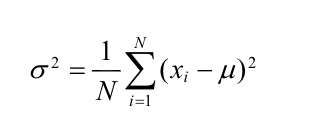

In [85]:
Image('분산.png')

In [86]:
cov_sample = sum((x-mu_x)*(y-mu_y)/N)
cov_sample

6.906

In [87]:
cov_sample2 = sum((x-mu_x)*(y-mu_y)/(N-1))
cov_sample2

7.673

즉, 공분산은 __X의 편차와 Y의 편차를 곱한것의 평균__이다.

### 3.2.10 분산-공분산 행렬(실습)

In [88]:
# scipy의 cov함수를 사용하면 짧은 코드로 분산-공분산 행렬을 계산할 수 있다.
sp.cov(x,y,ddof=0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  


array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [89]:
# 분모를 N-1로 설정해서 분산-공분산 행렬 계산하기
sp.cov(x,y,ddof=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  


array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 3.2.11 피어슨 상관계수

상관계수라고 하면 대부분 피어슨 상관계수를 뜻한다.\
이 식은 공분산을 최댓값 1, 최솟값 -1 사이가 되도록 표준화하는 것이기도 하다.(사용하기 편하도록)

공분산에도 문제점이 하나 있다.

X와 Y의 단위의 크기에 영향을 받는다는 것이다.

즉 다시말해 100점만점인 두과목의 점수 공분산은 별로 상관성이 부족하지만 100점만점이기 때문에 큰 값이 나오고

10점짜리 두과목의 점수 공분산은 상관성이 아주 높을지만 10점만점이기 때문에 작은값이 나온다.

이것을 보완하기 위해 상관계수(Correlation)가 나타난다.


상관계수라는 개념이 왜 나왔는지 생각하다 보면 의외로 간단하다.

__확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시켰다고 생각하면 된다.__
즉, 분산의 크기만큼 나누었다고 생각하면 된다.

상관계수의 정의는 아래와 같이 __공분산을 각각의 표준편차로 나누어준 값이다.__

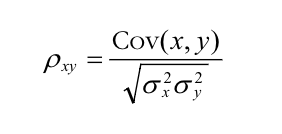

In [95]:
Image('피어슨 상관계수.png')

https://nittaku.tistory.com/456

__상관계수의 성질__
1. 상관계수의 절대값은 1을 넘을 수 없다.

2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.

3. X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1이다.
(양의 선형관계면 1, 음의 선형관계면 -1)

### 상관행렬 밑에 있음

### 3.2.13 피어슨 상관계수 실습

In [98]:
# 분산 계산 
sigma_2_x = sp.var(x)
sigma_2_y = sp.var(y)

rho = cov_sample/sp.sqrt(sigma_2_x * sigma_2_y)
print("rho:", rho)

# 분산 계산
sigma_2_x_2 = sp.var(x, ddof=1)
sigma_2_y_2 = sp.var(y, ddof=1)

# 상관 계수
rho2 = cov_sample2/sp.sqrt(sigma_2_x_2 * sigma_2_y_2)
print("rho2:", rho2)

# 분모와 분자가 같은 값으로 나눠지므로 분산과 공분산 계산식의 분모에
# N을 사용하든 N-1을 사용하든 상관계수는 변하지 않음.
# 따라서 밑의 두 값이 같다. 

rho: 0.7592719041137088
rho2: 0.7592719041137088


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  # Remove the 

### 3.2.12 상관행렬

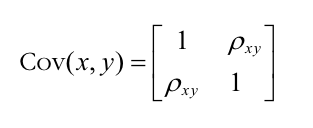

In [96]:
Image('상관행렬.png')

In [49]:
# 상관행렬 구하기
sp.corrcoef(x,y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  """Entry point for launching an IPython kernel.


array([[1.   , 0.759],
       [0.759, 1.   ]])

### 3.2.14 상관계수가 무의미할 때

상관계수가 0일 때 = 확률변수 X, Y가 독립일 때

## 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

matplotlib은 그래프를 그리는 표준 라이브러리이다.\
seaborn은 matplotlib의 그래프를 __더 예쁘게 그리기 위한__ 라이브러리이다.

In [130]:
# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.3.3 pyplot을 이용한 꺾은선 그래프

In [131]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

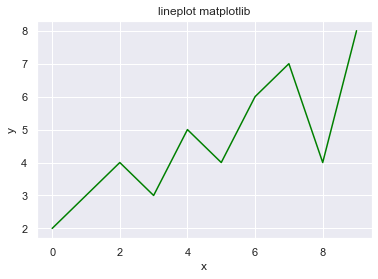

In [132]:
# 꺾은선 그래프 그리기
plt.plot(x,y, color= 'green') # 그래프를 그리는 함수는 plt.plot이다. 

# plt.plot으로 그래프를 그린 뒤, title과 xlabel등을 지정한다.
plt.title('lineplot matplotlib') 
plt.xlabel('x')
plt.ylabel('y')

# plt.savefig('파일명') 으로 작성한 그래프를 파일로 저장할 수 있다.

In [117]:
# seaborn 취소하는 코드 / 취소코드/ 취소 코드
# plt.rcdefaults()

In [118]:
plt.rcdefaults()

### 3.3.4 seaborn과 pyplot을 이용한 꺾은선 그래프

In [133]:
# seaborn은 matplotlib의 그래프를 더 예쁘게 그리기 위한 라이브러리이다.
import seaborn as sns

# 로드한 seaborn을 실행하기 - matplotlib에 seaborn디자인 얹기
sns.set()

Text(0, 0.5, 'y')

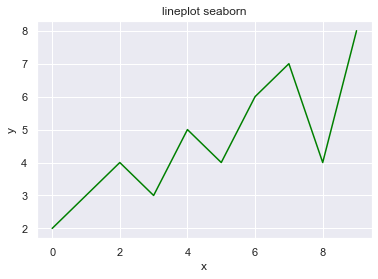

In [134]:
# 위와 코드는 같지만 디자인이 바뀐 것을 알 수 있다.
plt.plot(x,y, color='green') 
plt.title('lineplot seaborn') 
plt.xlabel('x')
plt.ylabel('y')

### 3.3.5 seaborn을 이용한 히스토그램

In [141]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

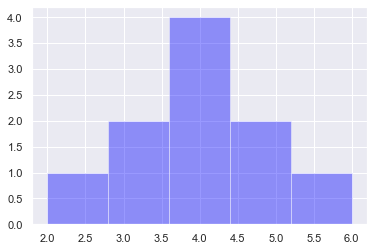

In [149]:
# bins = 5 는 5개 구간으로 나누어 도수를 표시한다는 뜻
# kde = False 는 커널밀도추정을 하지 않겠다는 파라미터이다. 
sns.distplot(fish_data, bins = 5, color = 'blue', kde = False)

### 3.3.6 커널밀도추정에 따른 히스토그램 평활화

커널밀도추정은 히스토그램이 가진 문제를 해소하기 위한 방법니다. 히스토그램의 문제는 구간을 어떻게 정하느냐에 따라 모양이 크게 바뀐다는 것에 있다. 극단적인 예를 들면 bins=1로 지정하면 직사각형의 히스토그램이 만들어져, 데이터의 특징이 전혀 드러나지 않게 된다.\
따라서 히스토그램을 부드러운 선으로 이어나가는 것이 어떨까 하는 발상을 하게 되었는데 그것이 __히스토그램 평활화__이다. 커널밀도추정은 히스토그램 평활화를 하기 위한 방법 중 하나이다.\
커널밀도추정의 결과를 표시하려면 위의 코드에서 __kde = False를 지우면 된다. 그리고 bins 역시 지정하지 않으면__ 된다.

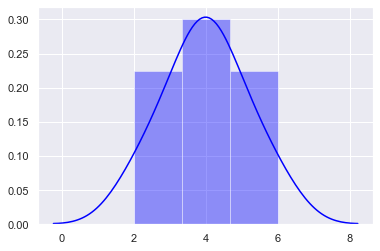

In [153]:
sns.distplot(fish_data, color = 'blue')

히스토그램에 부드러운 곡선이 그려지고, 세로축의 값이 변한 것을 알 수 있다.\
히스토그램의 면적 합계가 1이 되도록 세로축을 변경한 것이다.\
이를 명시적으로 지정할 경우 norm_hist = True를 넘기면 된다.

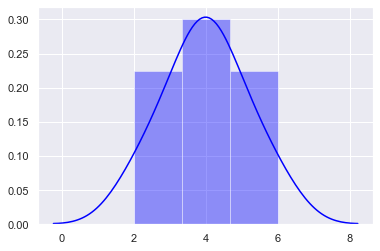

In [154]:
sns.distplot(fish_data, color = 'blue', norm_hist = True)

### 3.3.7 2변량 데이터에 대한 히스토그램 - 히스토그램 겹쳐서 그리기

In [155]:
fish_multi = pd.read_csv('https://raw.githubusercontent.com/runble1/atarashii_toukei/master/3-3-2-fish_multi_2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [157]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [168]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']

In [169]:
length_a

0    2
1    3
2    3
3    4
4    4
5    4
6    4
7    5
8    5
9    6
Name: length, dtype: int64

In [171]:
length_b

10    5
11    6
12    6
13    7
14    7
15    7
16    7
17    8
18    8
19    9
Name: length, dtype: int64

Text(0.5, 1.0, 'histogram for 2변량 데이터')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from c

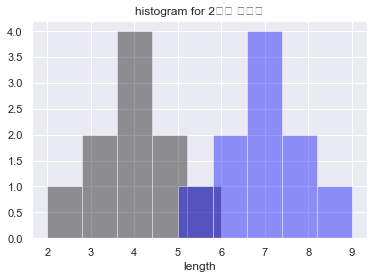

In [170]:
# 히스토그램을 그리는 함수를 2번 연속 실행하면 겹쳐진 히스토그램을 그릴 수 있다. 
sns.distplot(length_a, bins=5, color = 'black', kde = False)
sns.distplot(length_b, bins=5, color = 'blue', kde = False)
plt.title('histogram for 2변량 데이터')

### 3.3.8 다변량 데이터를 시각화하는 코드 작성

#### seaborn을 사용할 경우 대부분 아래와 같은 형식으로 그래프를 그릴 수 있게 되어 있다.
sns.함수명(
x = 'x축의 열 이름',
y = 'y축의 열 이름',
data = 데이터프레임,
그_외의_인수)

### 3.3.9 상자그림(박스플롯)

종류별 물고기 몸 길이 등 '카테고리 변수' x '수치형변수' 조합의 데이터를 표시해야 할 경우
__상자그림(박스플롯)__을 사용하는 경우가 많다. 

In [180]:
# sns.boxplot 함수를 사용한다.

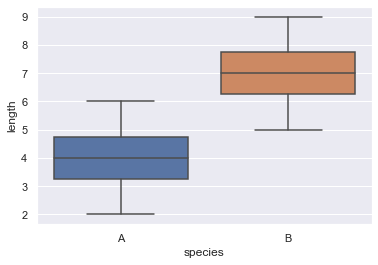

In [181]:
sns.boxplot(x='species', y='length', data = fish_multi)

상자의 중심선은 중앙값을 나타낸다. 윗단과 아랫단은 각각 75%, 25% 사분위점을 나타낸다.\
수염은 데이터의 범위를 나타낸다. (밑 표 참조)

In [182]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

### 3.3.10 바이올린플롯

바이올린플롯은 상자그림의 상자 대신 커널밀도추정의 결과를 사용한 것이다. 비교적 최근에 등장한 그래프이지만 가독성이 좋다.

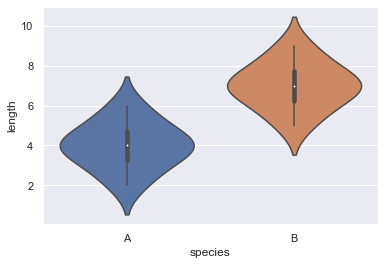

In [183]:
# sns.violinplot()를 사용한다.
sns.violinplot(x='species', y='length', data = fish_multi)

곡선은 커널밀도추정의 결과이다. 쉽게 말해 상자 대신 히스토그램을 세로로 세워서 배치한 상자 그림이다. 
어느 부분에 데이터가 집중되어 있는지 정보가 추가되어 있다. 

### 3.3.11 막대그래프

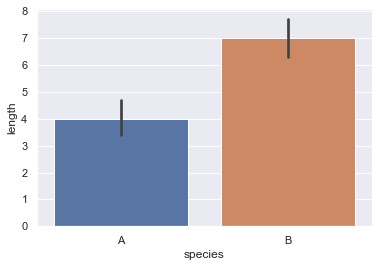

In [184]:
# sns.barplot()를 사용한다. 
# 함수 이름이 바뀐 것 외에는 상자그림과 완전히 똑같이 사용한다. 
sns.barplot(x='species', y='length', data = fish_multi)

각 막대의 높이는 평균값을 표시한다.\
검은 선은 에러바 라고 하며 신뢰구간을 표시한다. 

### 3.3.12 산포도

산포도는 '수치형변수'x'수치형변수'조합의 그래프이다.

In [185]:
cov_data = pd.read_csv('https://raw.githubusercontent.com/runble1/atarashii_toukei/master/3-2-3-cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


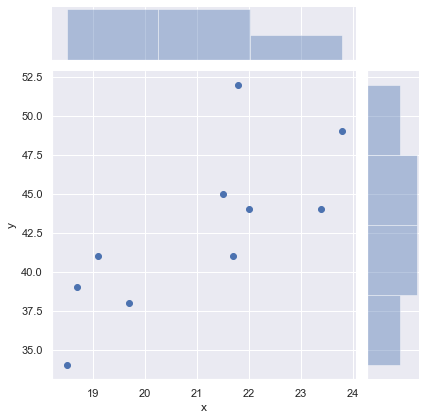

In [186]:
# 산포도와 함께 히스토그램도 붙어 있는 그래프가 그려진다. 
sns.jointplot(x='x',y='y', data=cov_data)

### 3.3.13 페어플롯

In [187]:
# 많은 양의 변수를 가지고 있는 데이터를 대상으로 그래프 그리기
# 2개 이상의 변수를 모아서 정리하여 표시하는 방법은 코드가 조금 달라진다.

In [192]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [193]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


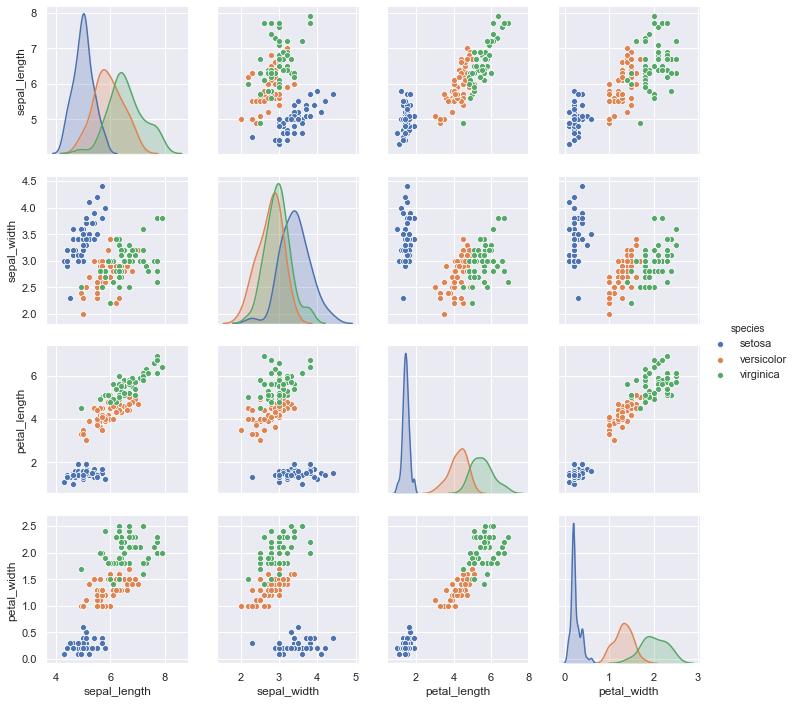

In [199]:
sns.pairplot(iris, hue = 'species')# , palette = 'gray')
# pairplot 함수는 데이터프레임만 넘겼을 땐 산포도를 그리지만 
# hue = "카테고리 변수의 열 이름"을 인수로 넘기면 카테고리별로 색을 나누어 그래프를 그려준다.
# hue는 지표를 나타내기 위함이다. 
# palette 는 색상인데 디폴트는 블루

산포도 또는 변산도는 변량이 흩어져 있는 정도를 하나의 수로 나타낸 값이다. 범위, 사분위수 범위, 분산, 표준 편차, 절대 편차, 변동 계수 등이 이에 속한다.

## 5/18 여기까지함 (그리고 이어서함)

집가서 3.1.10 까지 하고 개념원리 들어가고 AWS 하나 듣고 
sql좀 하고
회사 데이터 좀만 더 보고 자기
do it 도 하기
그리고 8시에 일어나 걍 ^^
어차피 주말에 노니까 평일에 미친듯이 좀 하기